![title](https://cdn-images-1.medium.com/max/1000/1*2uGt_aWJoBjqF2qTzRc2JQ.jpeg)
# Iris dataset
The iris dataset was created by the British statistician and biologist Ronald Fisher in 1936. The dataset consists of three types of iris flower (setosa, virginica and versicolor).

The data set consists of 150 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Based on Fisher's linear discriminant model, this data set became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

In [1]:
# For building neural networks.
import keras as kr

# For interacting with data sets.
import pandas as pd

# For encoding categorical variables.
import sklearn.preprocessing as pre

# For splitting into training and test sets.
import sklearn.model_selection as mod

from keras.layers import Dense,Activation,Dropout 

# For plotting scatter plot.
import matplotlib.pyplot as plt

C:\Users\niall\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load the dataset from a specified URL

In [2]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

In [3]:
# print the entire dataset
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0    

# Inputs divided into four features 
Each of these features is a input neuron for the neural network that will in the end output one of three neurons that will signify that network has predicted what type of iris the output is.

In [4]:
# Separate the inputs from the rest of the variables.
inputs = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

# The outputs are encoded using 3 values 
                        Setosa      = [1, 0, 0]
                        Verscicolor = [0, 1, 0]
                        Virginica   = [0, 0, 1]

In [5]:
# Encode the classes as above.
encoder = pre.LabelBinarizer()
encoder.fit(df['species'])
outputs = encoder.transform(df['species'])

outputs

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

# Features

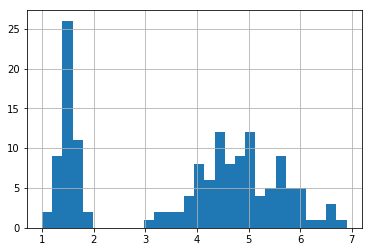

In [6]:
df['petal_length'].hist(bins = 30)

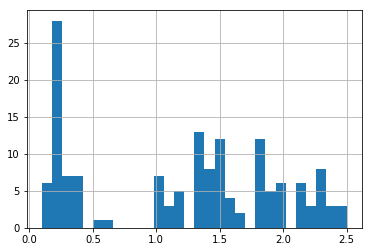

In [7]:
df['petal_width'].hist(bins = 30)

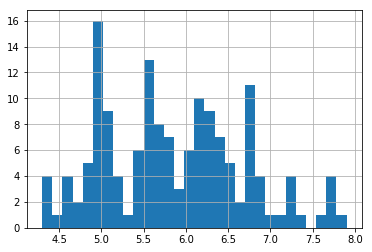

In [8]:
df['sepal_length'].hist(bins = 30)

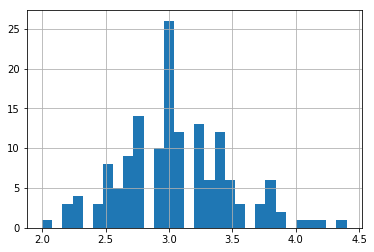

In [9]:
df['sepal_width'].hist(bins = 30)

# Seaborn
The following graphs were generated by using Seaborn which is visualization library based on mathplotlib for python. 

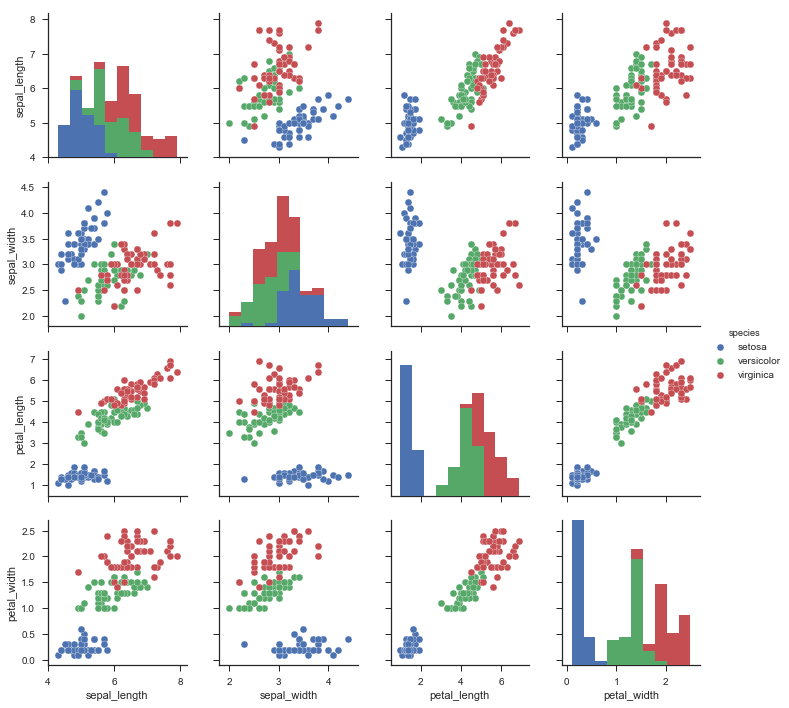

In [10]:
# Adapted from: https://seaborn.pydata.org/examples/scatterplot_matrix.html
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

We can see from pairplot above that the setosas are easily distingushed from the versicolor and verginica. The main problem with this dataset the the distincion between versicolor and virinica because they are not linearly seperable from each other like the setosa is meaning that we can not draw a straight line parallel to one of the axis to clearly seperate the data.

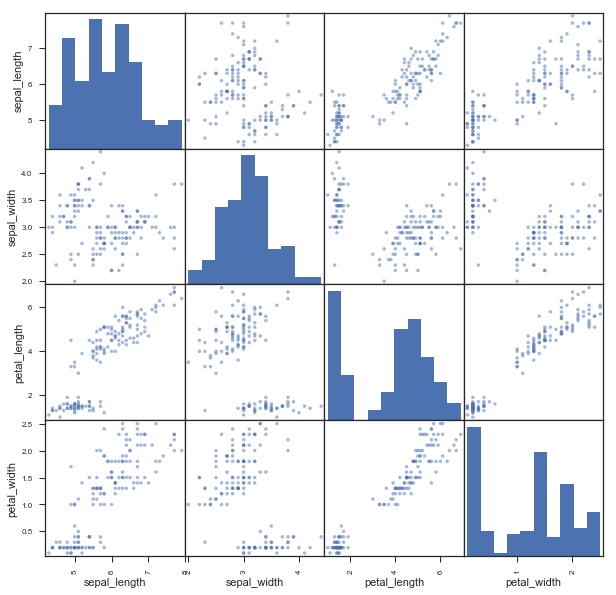

In [11]:
# Adapted from: https://www.kaggle.com/aceccon/2-iris-dataset-basic-classification-algorithms
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

# Classifications
I will be building classification models to seperate the data for evaluation.
I will need to separate the data into training data and labels.

This models consists of 3 hidden layers with a total of 180 nuerons, 4 input neurons and 3 output neurons. The Dropout drops random biases each time the model is trained to avoid over training. 

Because the encoder assigns a value to each of the flowers because we are using softmax as the activation function on the last layer it will out put a value between 0 and 1 for its prediction, we then check these against the values given by the encoder in order to determine whether the prediction was correct or not.

In [12]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# ---------- MODEL ----------
# Add a hidden layer with 100 neurons and an input layer with 4.
model.add(kr.layers.Dense(units=100, activation='relu', input_dim=4))
# Add a hidden layer with 50 neurons.
model.add(kr.layers.Dense(units=50, activation='relu', input_dim=4))
# Add a hidden layer with 30 neurons.
model.add(kr.layers.Dense(units=30, activation='relu', input_dim=4))
# Dropout drops random biases within the network as it trains
model.add(Dropout(0.2))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=3, activation='softmax'))

# Build the graph.
# Optimizer taken from: https://keras.io/optimizers/
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
# Model sumary of parameters for each layer and the shape of each one.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 93        
Total params: 7,173
Trainable params: 7,173
Non-trainable params: 0
_________________________________________________________________


# Splitting the data 
We split the data into 4 sections we have the the training data and labels to test against and we have testing data which we will compare to the output test once the network has made its predictions. The test size dictates the size of the test data, as we can see it's set to 0.7 meaning the test data is made up of 70% of the total iris dataset.

In [14]:
# Split the inputs and outputs into training and test sets.
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.7)

# Training the network
The neural network will be divided into training data and testing data the testing data will be given labels in order to compare against and ensure accuracy.

Due to the similarity in the training data between the versicolor and virginica we need to run many epochs so the model is trained enough to be able to distinguish between the two. Because of the small size of the dataset we are able to run this without having to wait for an extended period of time.

In [15]:
# Train the neural network.
model.fit(inputs_train, outputs_train, epochs=20, batch_size=10, verbose=1)

Epoch 1/20
45/45 [==============================] - 3s 69ms/step - loss: 1.1816 - acc: 0.2444
Epoch 2/20
45/45 [==============================] - 0s 399us/step - loss: 1.0503 - acc: 0.4889
Epoch 3/20
45/45 [==============================] - 0s 610us/step - loss: 0.9711 - acc: 0.6222
Epoch 4/20
45/45 [==============================] - 0s 347us/step - loss: 0.8792 - acc: 0.6889
Epoch 5/20
45/45 [==============================] - 0s 437us/step - loss: 0.8133 - acc: 0.7556
Epoch 6/20
45/45 [==============================] - 0s 309us/step - loss: 0.7499 - acc: 0.7556
Epoch 7/20
45/45 [==============================] - 0s 554us/step - loss: 0.7002 - acc: 0.7778
Epoch 8/20
45/45 [==============================] - 0s 332us/step - loss: 0.6339 - acc: 0.8667
Epoch 9/20
45/45 [==============================] - 0s 244us/step - loss: 0.5811 - acc: 0.8889
Epoch 10/20
45/45 [==============================] - 0s 488us/step - loss: 0.5478 - acc: 0.8000
Epoch 11/20
45/45 [==============================]

In [16]:
# Have the network predict the classes of the test inputs.
predictions = model.predict(inputs_test)
predictions = encoder.inverse_transform(predictions)
predictions

array(['setosa', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'virginica', 'virginica',
       'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virgini

In [17]:
# Compare the predictions to the actual classes.
predictions == encoder.inverse_transform(outputs_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [18]:
# Number of correct predictions out of 105
(predictions == encoder.inverse_transform(outputs_test)).sum()

104

As we can see we have achieved a good score in terms of predicting the type of iris using the models we have set up.

# References
Iris dataset origins : https://en.wikipedia.org/wiki/Iris_flower_data_set

3D scatter plot: https://github.com/camila-ud/3D-Scatter-plot/blob/master/3DScatterIris.py

# End